In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [3]:
# Import dataset and clean it
df= pd.read_csv('C:/Users/Administrator/Desktop/Sentinel Hulu Perak/sentinel Hulu Perak Mac 2019/Sampel hulu perak/HuluPerak_training.csv', sep=",", decimal='.' )
df.head()

,id,poly_id,point_id,id_2,BD1,BD2,BD3,BD4,BD5,BD6,BD7,BD8,BD9,BD10
0,0,0,0,3.0,297,557,364,989,2630,3139,3300,3485,1859,874
1,1,0,1,3.0,268,512,270,954,2831,3417,3609,3669,1809,834
2,2,0,2,3.0,297,568,312,954,2831,3417,3683,3669,1809,834
3,3,0,3,3.0,345,590,351,989,2630,3139,3199,3485,1859,874
4,4,0,4,3.0,298,525,305,948,2922,3559,3716,3999,1884,840


In [4]:
filters = [(df.id_2 == 1), (df.id_2 == 2), (df.id_2 == 3),(df.id_2 == 4),
           (df.id_2 == 5), (df.id_2 == 6), (df.id_2 == 7)]

values = ["Water Body", "Build up Area", "Rubber", "Palm Oil", "Other vegetation", "Forest", "Bare Land"]   

df ["Class_name"] = np.select(filters, values)
df.drop(['id','poly_id','point_id'],axis=1, inplace=True)
df.rename(columns= {'id_2': 'Class_id'}, inplace=True)
df=df[['Class_name','Class_id','BD1', 'BD2', 'BD3', 'BD4', 'BD5', 'BD6', 'BD7', 'BD8', 'BD9', 'BD10']]
df.head()

,Class_name,Class_id,BD1,BD2,BD3,BD4,BD5,BD6,BD7,BD8,BD9,BD10
0,Rubber,3.0,297,557,364,989,2630,3139,3300,3485,1859,874
1,Rubber,3.0,268,512,270,954,2831,3417,3609,3669,1809,834
2,Rubber,3.0,297,568,312,954,2831,3417,3683,3669,1809,834
3,Rubber,3.0,345,590,351,989,2630,3139,3199,3485,1859,874
4,Rubber,3.0,298,525,305,948,2922,3559,3716,3999,1884,840


In [5]:
print(df.isnull().sum())

Class_name     0
Class_id      19
BD1            0
BD2            0
BD3            0
BD4            0
BD5            0
BD6            0
BD7            0
BD8            0
BD9            0
BD10           0
dtype: int64


In [6]:
dfclass1 = df[(df.Class_id == 1)]
dfclass2 = df[(df.Class_id == 2)]
dfclass3 = df[(df.Class_id == 3)]
dfclass4 = df[(df.Class_id == 4)]
dfclass5 = df[(df.Class_id == 5)]
dfclass6 = df[(df.Class_id == 6)]
dfclass7 = df[(df.Class_id == 7)]

<AxesSubplot:>

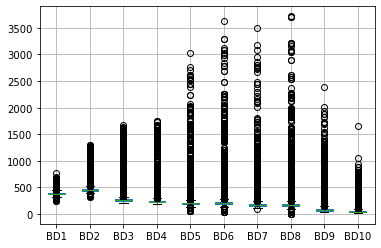

In [7]:
dfclass1.boxplot(column= ['BD1', 'BD2', 'BD3', 'BD4', 'BD5', 'BD6', 'BD7', 'BD8', 'BD9', 'BD10'])

In [21]:
dfclass4.drop(['Class_name'],axis=1, inplace=True)
dfclass4


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12744\3081947825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclass4.drop(['Class_name'],axis=1, inplace=True)


,Class_id,BD1,BD2,BD3,BD4,BD5,BD6,BD7,BD8,BD9,BD10
14848,4.0,370,651,409,1080,3033,3802,3950,4160,1966,844
14849,4.0,359,664,425,1048,3036,3647,3739,3896,1952,853
14850,4.0,350,623,419,1048,3036,3647,3792,3896,1952,853
14851,4.0,353,636,368,1002,2949,3711,3815,3865,1864,774
14852,4.0,353,611,380,1042,2991,3734,3835,4033,2037,913
...,...,...,...,...,...,...,...,...,...,...,...
18209,4.0,420,674,460,1187,2995,3704,3664,3990,2131,958
18210,4.0,452,688,491,1187,2995,3704,3550,3990,2131,958
18211,4.0,451,755,523,1160,3073,3707,3799,4062,2188,983
18212,4.0,495,764,557,1187,2995,3704,3704,3990,2131,958


In [23]:
dfclass4=dfclass4.astype ({"Class_id": 'int'})
display(dfclass4.dtypes)

Class_id    int32
BD1         int64
BD2         int64
BD3         int64
BD4         int64
BD5         int64
BD6         int64
BD7         int64
BD8         int64
BD9         int64
BD10        int64
dtype: object

In [26]:
#convert pd to numpy array
ndarray = dfclass4.to_numpy()

In [28]:
ndarray

array([[   4,  370,  651, ..., 4160, 1966,  844],
       [   4,  359,  664, ..., 3896, 1952,  853],
       [   4,  350,  623, ..., 3896, 1952,  853],
       ...,
       [   4,  451,  755, ..., 4062, 2188,  983],
       [   4,  495,  764, ..., 3990, 2131,  958],
       [   4,  475,  814, ..., 4094, 2248, 1037]], dtype=int64)

In [29]:
#To determine its pseudo-inverse, let us first obtain its Singular Value Decomposition
U,d,VT = np.linalg.svd(dfclass4)

In [31]:
U

array([[ 2.11990023e-02, -1.24844563e-02, -7.87300526e-04, ...,
        -2.06693560e-02, -2.02292328e-02, -1.93900777e-02],
       [ 2.03699956e-02, -1.03795738e-02, -1.37835636e-02, ...,
         3.26531244e-03,  1.02699908e-02,  7.90860801e-03],
       [ 2.04237996e-02, -1.06928271e-02, -8.59398741e-03, ...,
        -9.55584862e-03,  9.04006845e-03, -2.04106407e-02],
       ...,
       [ 2.11413701e-02, -6.81289910e-03, -1.65772138e-02, ...,
         9.97023680e-01, -2.86817151e-03, -2.76372674e-03],
       [ 2.08093033e-02, -6.52947427e-03, -2.50334575e-02, ...,
        -2.89134237e-03,  9.95359301e-01, -4.70644677e-03],
       [ 2.16709118e-02, -5.70392765e-03, -3.41899941e-02, ...,
        -2.82212255e-03, -4.68845435e-03,  9.93677254e-01]])

In [32]:
d

array([3.72626584e+05, 6.32185871e+04, 6.49761862e+03, 4.89607649e+03,
       4.15253630e+03, 2.36534270e+03, 1.94093317e+03, 1.81053697e+03,
       1.37427959e+03, 9.54974961e+02, 8.66663576e+00])

In [33]:
VT

array([[ 5.35381897e-04,  5.72594744e-02,  9.44909020e-02,
         7.42771275e-02,  1.55512714e-01,  3.79459596e-01,
         4.63576498e-01,  4.69507889e-01,  5.03687232e-01,
         3.15047437e-01,  1.60639696e-01],
       [-2.35527067e-05,  1.10127258e-01,  1.34481411e-01,
         2.64783633e-01,  2.41862810e-01, -1.01119804e-01,
        -2.30768015e-01, -2.20940434e-01, -2.18787386e-01,
         6.21306424e-01,  5.43134777e-01],
       [-5.36747908e-04, -1.82950306e-01, -4.00593250e-01,
        -2.26334677e-01, -5.55684013e-01, -4.62496922e-01,
         2.25740213e-02,  2.69641560e-01,  1.21716490e-01,
         2.75054186e-01,  2.61634417e-01],
       [-1.70989567e-04,  1.78721685e-01,  2.46565718e-01,
         3.34386915e-01,  1.45848484e-02, -2.38769988e-01,
        -2.21367805e-01,  7.43419636e-01, -3.03034037e-01,
        -2.10845926e-01,  1.62280609e-02],
       [-2.32990110e-04, -3.10217509e-01, -1.54181115e-01,
        -5.73578993e-01,  3.23773055e-01,  3.26495835e-01,
  

In [35]:
#to compute A†, we require V and D† 
#To determine D†, we first create a diagonal matrix D using singular values 

D = np.diag(d)
D

array([[3.72626584e+05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.32185871e+04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.49761862e+03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.89607649e+03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.15253630e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+

In [36]:
#The next thing is to take the reciprocal of all non-zero entries in this diagonal matrix. Note that we only take the reciprocal for non-zero entries.

#From the linalg model, we use the inv() method to get the above matrix inverted automatically.

D_inver = np.linalg.inv(D)
D_inver

array([[2.68365179e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.58181327e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.53902539e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.04245175e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.40816679e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+

In [38]:
#To meet the law of matrix multiplication, we need to ensure the number of columns of D† matches the number of rows of U.
#check dimensions
print("Dimensions of D_inver " + str(D_inver.shape)
       +" != "+"Dimensions of U "+ str(U.shape))

Dimensions of D_inver (11, 11) != Dimensions of U (2495, 2495)


In [39]:
Dplus = np.concatenate([D_inver,U])
print(Dplus)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 11 and the array at index 1 has size 2495

In [24]:
#create function to calculate Mahalanobis distance
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

In [25]:
mah_df = dfclass4.copy()
mah_df['Mahalanobis'] = mahalanobis(x=mah_df, data=mah_df)
mah_df.head(3)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


LinAlgError: Singular matrix

In [16]:
#create new column in dataframe that contains Mahalanobis distance for each row
dfclass4['mahalanobis'] = mahalanobis(x=dfclass4, data=dfclass4[['Class_id', 'BD1', 'BD2', 'BD3', 'BD4', 'BD5', 'BD6', 'BD7', 'BD8', 'BD9', 'BD10']])

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


LinAlgError: Singular matrix

In [12]:
df['mahalanobis'] = mahalanobis(x=df, data=df[['Class_id', 'BD1', 'BD2', 'BD3', 'BD4', 'BD5', 'BD6', 'BD7', 'BD8', 'BD9', 'BD10']])

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ValueError: shapes (667075,12) and (11,11) not aligned: 12 (dim 1) != 11 (dim 0)

In [20]:
result = df.dtypes
result

Class_name     object
Class_id      float64
BD1             int64
BD2             int64
BD3             int64
BD4             int64
BD5             int64
BD6             int64
BD7             int64
BD8             int64
BD9             int64
BD10            int64
dtype: object